In [102]:
import os 

BASE_PATH = "/Users/milesklingenberg/Documents/Personal/Fillet_Project/salmon_escapement_project/Salmon_Project/Salmon_Project.v1i.tensorflow"
IMAGES_PATH = os.path.sep.join([BASE_PATH, "train/images/"])
ANNOTS_PATH = os.path.sep.join([BASE_PATH, "train/_annotations.csv"])

In [2]:
BASE_OUTPUT = "/Users/milesklingenberg/Documents/Personal/Fillet_Project/Salmon_Escapement_Project/Salmon_Project"

MODEL_PATH = os.path.sep.join([BASE_OUTPUT, "detector.h5"])
PLOT_PATH = os.path.sep.join([BASE_OUTPUT, "plot.png"])
TEST_FILENAMES = os.path.sep.join([BASE_OUTPUT, "test_images.txt"])

In [3]:
INIT_LR = 1e-4
NUM_EPOCHS = 25
BATCH_SIZE = 32

In [129]:
#from pyimagesearch import config
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import pandas as pd
from PIL import Image
import csv
import glob
from keras.preprocessing import image
import tensorflow as tf

In [114]:
print("[INFO] loading dataset...")

annotations = pd.read_csv(ANNOTS_PATH)

imgs = []
data = [] 
targets = []
filenames = []

[INFO] loading dataset...


In [42]:
startX = list(annotations['xmin']/416)
startY = list(annotations['ymin']/416)
endX = list(annotations['xmax']/416)
endY = list(annotations['ymax']/416)

filename = list(annotations['filename'])

In [43]:
targets.append((startX, startY, endX, endY))
filenames.append(filename)

In [126]:
batch_size = 16

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    IMAGES_PATH,
    label_mode=None, 
    validation_split=0.2, 
    subset="training", 
    seed=123, 
    batch_size = batch_size)

Found 224 files belonging to 1 classes.
Using 180 files for training.


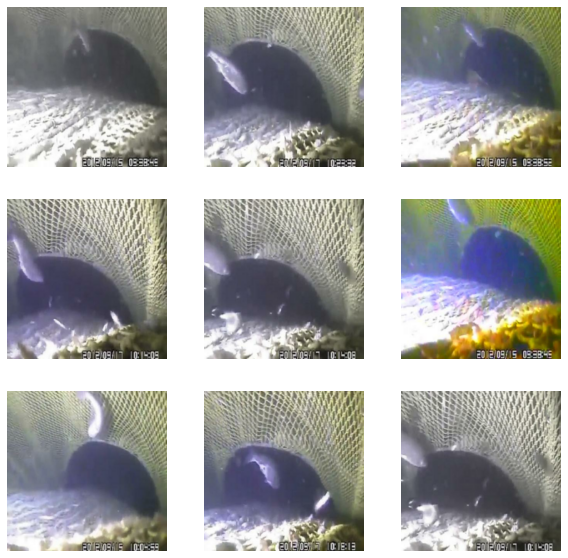

In [136]:
plt.figure(figsize=(10, 10))
for images in train_ds.take(5):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")